In [1]:
import sys 
sys.path.append("..")
from src.dataset import Dataset
import pandas as pd
import os
from definitions import get_synthetic_splits


In [2]:
# dataset_generator = Dataset("compas", ignore_features=["id", "age_cat", "priors_count.1", "violent_recid"])
dataset = "adult"
dataset_generator = Dataset(dataset)
target = dataset_generator.target
SAMPLING_METHOD = "class_protected"
GENERATION_METHOD = "cart"
r'$\bf{Bold}$ Title'
nice_dataset_names = {"adult": r"$\textbf{Adult}$" +" dataset", "german": r"$\textbf{German credit}$" +" dataset", "dutch": r"$\textbf{Dutch census}$" +" dataset", "credit": r"$\textbf{Credit card clients}$" +" dataset"}
sampling_methods = ['class', 'class_protected', 'protected', 'same_class']
sampling_methods_names = ['class', 'class \& protected', 'protected', 'class (same)']



Dataset adult_fnlwgt_educational-num has ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'] categorical and ['age', 'capital-gain', 'capital-loss', 'hours-per-week'] numerical columns.


In [3]:
protected_attributes = ["sex"]
split_dfs, additional_sizes = dataset_generator.split_population(dataset_generator.original_dataframe, protected_attributes)


/home/panagiotou/Desktop/FairAugment/util/../src/dataset.py:644: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for attr_values, indices in dataframe.groupby(protected_attributes).groups.items():


In [15]:
split_df_keys, split_df_vals = zip(*split_dfs.items())
from definitions import get_synthetic_splits


final_augmented_dataset_plots = []
sampling_methods = ['class', 'class_protected', 'protected', 'same_class']
sampling_methods_names = ['class', 'class-protected', 'protected', 'class (same)']

for sampling_method in sampling_methods:
    augmented_dfs, augmented_dfs_plot = get_synthetic_splits(dataset_generator, split_dfs, generative_method=GENERATION_METHOD, generative_seed=0, return_plot=True, sampling_method=sampling_method)
    final_augmented_dataset = pd.concat(augmented_dfs)
    final_augmented_dataset_plot = pd.concat(augmented_dfs_plot)
    final_augmented_dataset_plot['target_method'] = final_augmented_dataset_plot[target].astype(str) + ' (' + final_augmented_dataset_plot['method'].astype(str) + ')'
    final_augmented_dataset_plots.append(final_augmented_dataset_plot)

		 Synthetic samples cart
		 Synthetic samples cart
		 Synthetic samples cart
		 Synthetic samples cart


In [16]:
print(final_augmented_dataset.shape)
print(final_augmented_dataset_plot.shape)
print(len(augmented_dfs))
print([x.shape for x in augmented_dfs])
print(dataset_generator.original_dataframe.shape)

(49473, 13)
(49473, 15)
3
[(14695, 13), (4251, 13), (30527, 13)]
(45222, 13)


/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/ho

(68028, 15)
(83952, 15)
(61054, 15)
(49473, 15)


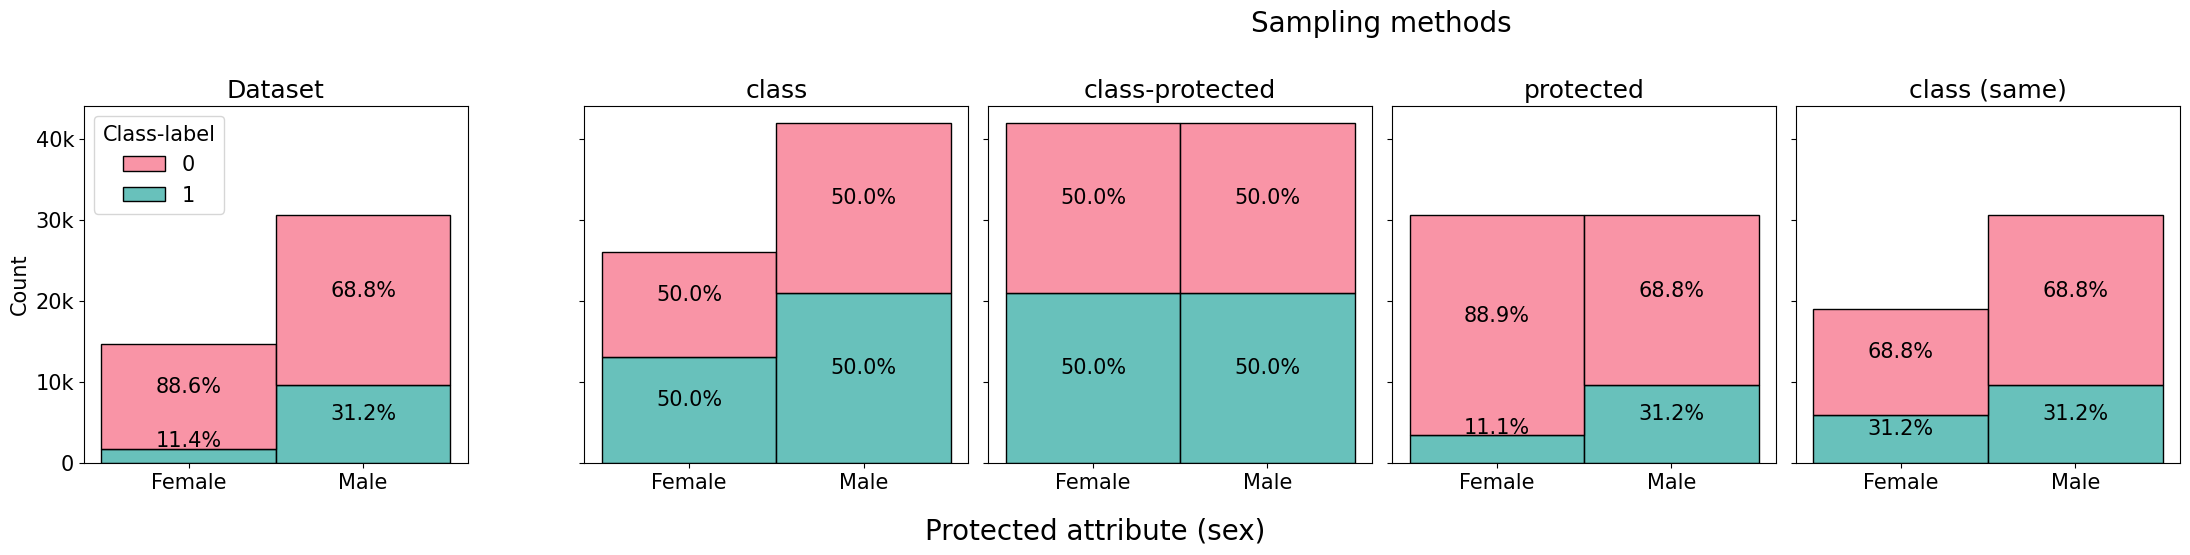

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Function to format y-axis labels
def format_ytick(x, pos):
    if x >= 1000:
        return '{:1.0f}k'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Apply the formatter to the y-axis
# Assuming you have two different DataFrames: df1 and df2
# Replace df1 and df2 with your actual DataFrame names


# Set up the plot with two subplots in two columns
fig, axes = plt.subplots(nrows=1, ncols=2 + len(sampling_methods), figsize=(22, 5.3), sharey=True, sharex=True, gridspec_kw={'width_ratios': [1, 0.2] + [1]*len(sampling_methods)})

# Define the palette using Seaborn's color palette generator
palette = sns.color_palette("husl", 2)  # Using 'husl' palette with 2 colors

gender_order = ['Female', 'Male']  # Adjust as per your actual category order

# Plot for df1
sns.histplot(data=dataset_generator.original_dataframe, x='sex', hue=target, palette=palette, multiple="stack", ax=axes[0], discrete = True)
axes[0].set_title('Dataset', fontsize=18)
axes[0].set_ylabel('Count', fontsize=15)

axes[0].set_xlabel('')


sns.move_legend(axes[0], "upper left", fontsize=15, title_fontsize=15)




for i, final_data in enumerate(final_augmented_dataset_plots):
    print(final_data.shape)
    sns.histplot(data=final_data, x='sex', hue=target, palette=palette, multiple="stack", ax=axes[i+2], discrete = True, legend=False)
    axes[i+2].set_title('{}'.format(sampling_methods_names[i]), fontsize=18)
    axes[i+2].set_xlabel('')

# Adjust layout

axes[1].axis('off') 

for ax in axes:
    for bar in ax.patches:
        # Find the total height of bars for the current x-coordinate
        total_height = sum(p.get_height() for p in ax.patches if p.get_x() == bar.get_x())
        # Calculate the percentage
        percentage = (bar.get_height() / total_height) * 100
        # Annotate the bar with the percentage

        if bar.get_height() < 5000:
            ax.annotate(f'{percentage:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2 + 0.4*bar.get_height()),
                        xytext=(0, 0),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=15)
        else:
            ax.annotate(f'{percentage:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2),
                xytext=(0, 0),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=15)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ytick))

fig.supxlabel("Protected attribute (sex)", fontsize=20)

fig.suptitle("Sampling methods", fontsize=20, y=1.02, x=0.63)  # Set super title

for ax in axes:
    ax.tick_params(axis='x', labelsize=15)  # Set font size for x-axis
    ax.tick_params(axis='y', labelsize=15)  # Set font size for y-axis


plt.tight_layout()


plt.show()

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Function to format y-axis labels
def format_ytick(x, pos):
    if x >= 1000:
        return '{:1.0f}k'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)


datasets = list(nice_dataset_names.keys())


def get_fad(datasets, sampling_methods):

    final_augmented_dataset_plots_all =[]
    for dd, dataset in enumerate(datasets):
        
        dataset_generator = Dataset(dataset)
        target = dataset_generator.target
        protected_attributes = ["sex"]
        split_dfs, additional_sizes = dataset_generator.split_population(dataset_generator.original_dataframe, protected_attributes)

        # Apply the formatter to the y-axis
        # Assuming you have two different DataFrames: df1 and df2
        # Replace df1 and df2 with your actual DataFrame names
        final_augmented_dataset_plots = []
        sampling_methods = ['class', 'class_protected', 'protected', 'same_class']
        sampling_methods_names = ['class', 'class & protected', 'protected', 'class (same)']

        for sampling_method in sampling_methods:
            augmented_dfs, augmented_dfs_plot = get_synthetic_splits(dataset_generator, split_dfs, generative_method="gaussian_copula", generative_seed=0, return_plot=True, sampling_method=sampling_method)
            final_augmented_dataset = pd.concat(augmented_dfs)
            final_augmented_dataset_plot = pd.concat(augmented_dfs_plot)
            final_augmented_dataset_plot['target_method'] = final_augmented_dataset_plot[target].astype(str) + ' (' + final_augmented_dataset_plot['method'].astype(str) + ')'
            final_augmented_dataset_plots.append(final_augmented_dataset_plot)

        final_augmented_dataset_plots_all.append(final_augmented_dataset_plots)
    return final_augmented_dataset_plots_all



In [6]:
final_augmented_dataset_plots_all = get_fad(datasets, sampling_methods)

Dataset adult_fnlwgt_educational-num has ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'] categorical and ['age', 'capital-gain', 'capital-loss', 'hours-per-week'] numerical columns.
		 Synthetic samples gaussian_copula


/home/panagiotou/Desktop/FairAugment/util/../src/dataset.py:644: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for attr_values, indices in dataframe.groupby(protected_attributes).groups.items():


		 Synthetic samples gaussian_copula
		 Synthetic samples gaussian_copula
		 Synthetic samples gaussian_copula
Dataset german has ['checking-account', 'credit-history', 'purpose', 'savings-account', 'employment-since', 'other-debtors', 'property', 'other-installment', 'housing', 'job', 'telephone', 'foreign-worker', 'marital-status'] categorical and ['duration', 'credit-amount', 'installment-rate', 'residence-since', 'age', 'existing-credits', 'numner-people-provide-maintenance-for'] numerical columns.
		 Synthetic samples gaussian_copula


/home/panagiotou/Desktop/FairAugment/util/../src/dataset.py:644: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for attr_values, indices in dataframe.groupby(protected_attributes).groups.items():


		 Synthetic samples gaussian_copula
		 Synthetic samples gaussian_copula
		 Synthetic samples gaussian_copula
Dataset dutch has ['age', 'household_position', 'household_size', 'prev_residence_place', 'citizenship', 'country_birth', 'edu_level', 'economic_status', 'cur_eco_activity', 'marital_status'] categorical and [] numerical columns.
		 Synthetic samples gaussian_copula


/home/panagiotou/Desktop/FairAugment/util/../src/dataset.py:644: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for attr_values, indices in dataframe.groupby(protected_attributes).groups.items():


		 Synthetic samples gaussian_copula
		 Synthetic samples gaussian_copula
		 Synthetic samples gaussian_copula
Dataset credit has ['education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'] categorical and ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'] numerical columns.
		 Synthetic samples gaussian_copula
		 Synthetic samples gaussian_copula
		 Synthetic samples gaussian_copula
		 Synthetic samples gaussian_copula


In [7]:
final_augmented_dataset_plots_all[0][0]["sex"]

4        Female
5        Female
6        Female
8        Female
12       Female
          ...  
11444      Male
11445      Male
11446      Male
11447      Male
11448      Male
Name: sex, Length: 68028, dtype: object

Dataset adult_fnlwgt_educational-num has ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'] categorical and ['age', 'capital-gain', 'capital-loss', 'hours-per-week'] numerical columns.


/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/ho

Dataset german has ['checking-account', 'credit-history', 'purpose', 'savings-account', 'employment-since', 'other-debtors', 'property', 'other-installment', 'housing', 'job', 'telephone', 'foreign-worker', 'marital-status'] categorical and ['duration', 'credit-amount', 'installment-rate', 'residence-since', 'age', 'existing-credits', 'numner-people-provide-maintenance-for'] numerical columns.
Dataset dutch has ['age', 'household_position', 'household_size', 'prev_residence_place', 'citizenship', 'country_birth', 'edu_level', 'economic_status', 'cur_eco_activity', 'marital_status'] categorical and [] numerical columns.


/tmp/ipykernel_50688/1239153019.py:19: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dfo['sex'] = dfo['sex'].replace({'female': 'Female', 'male': 'Male'})
/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

Dataset credit has ['education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'] categorical and ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'] numerical columns.


/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/ho

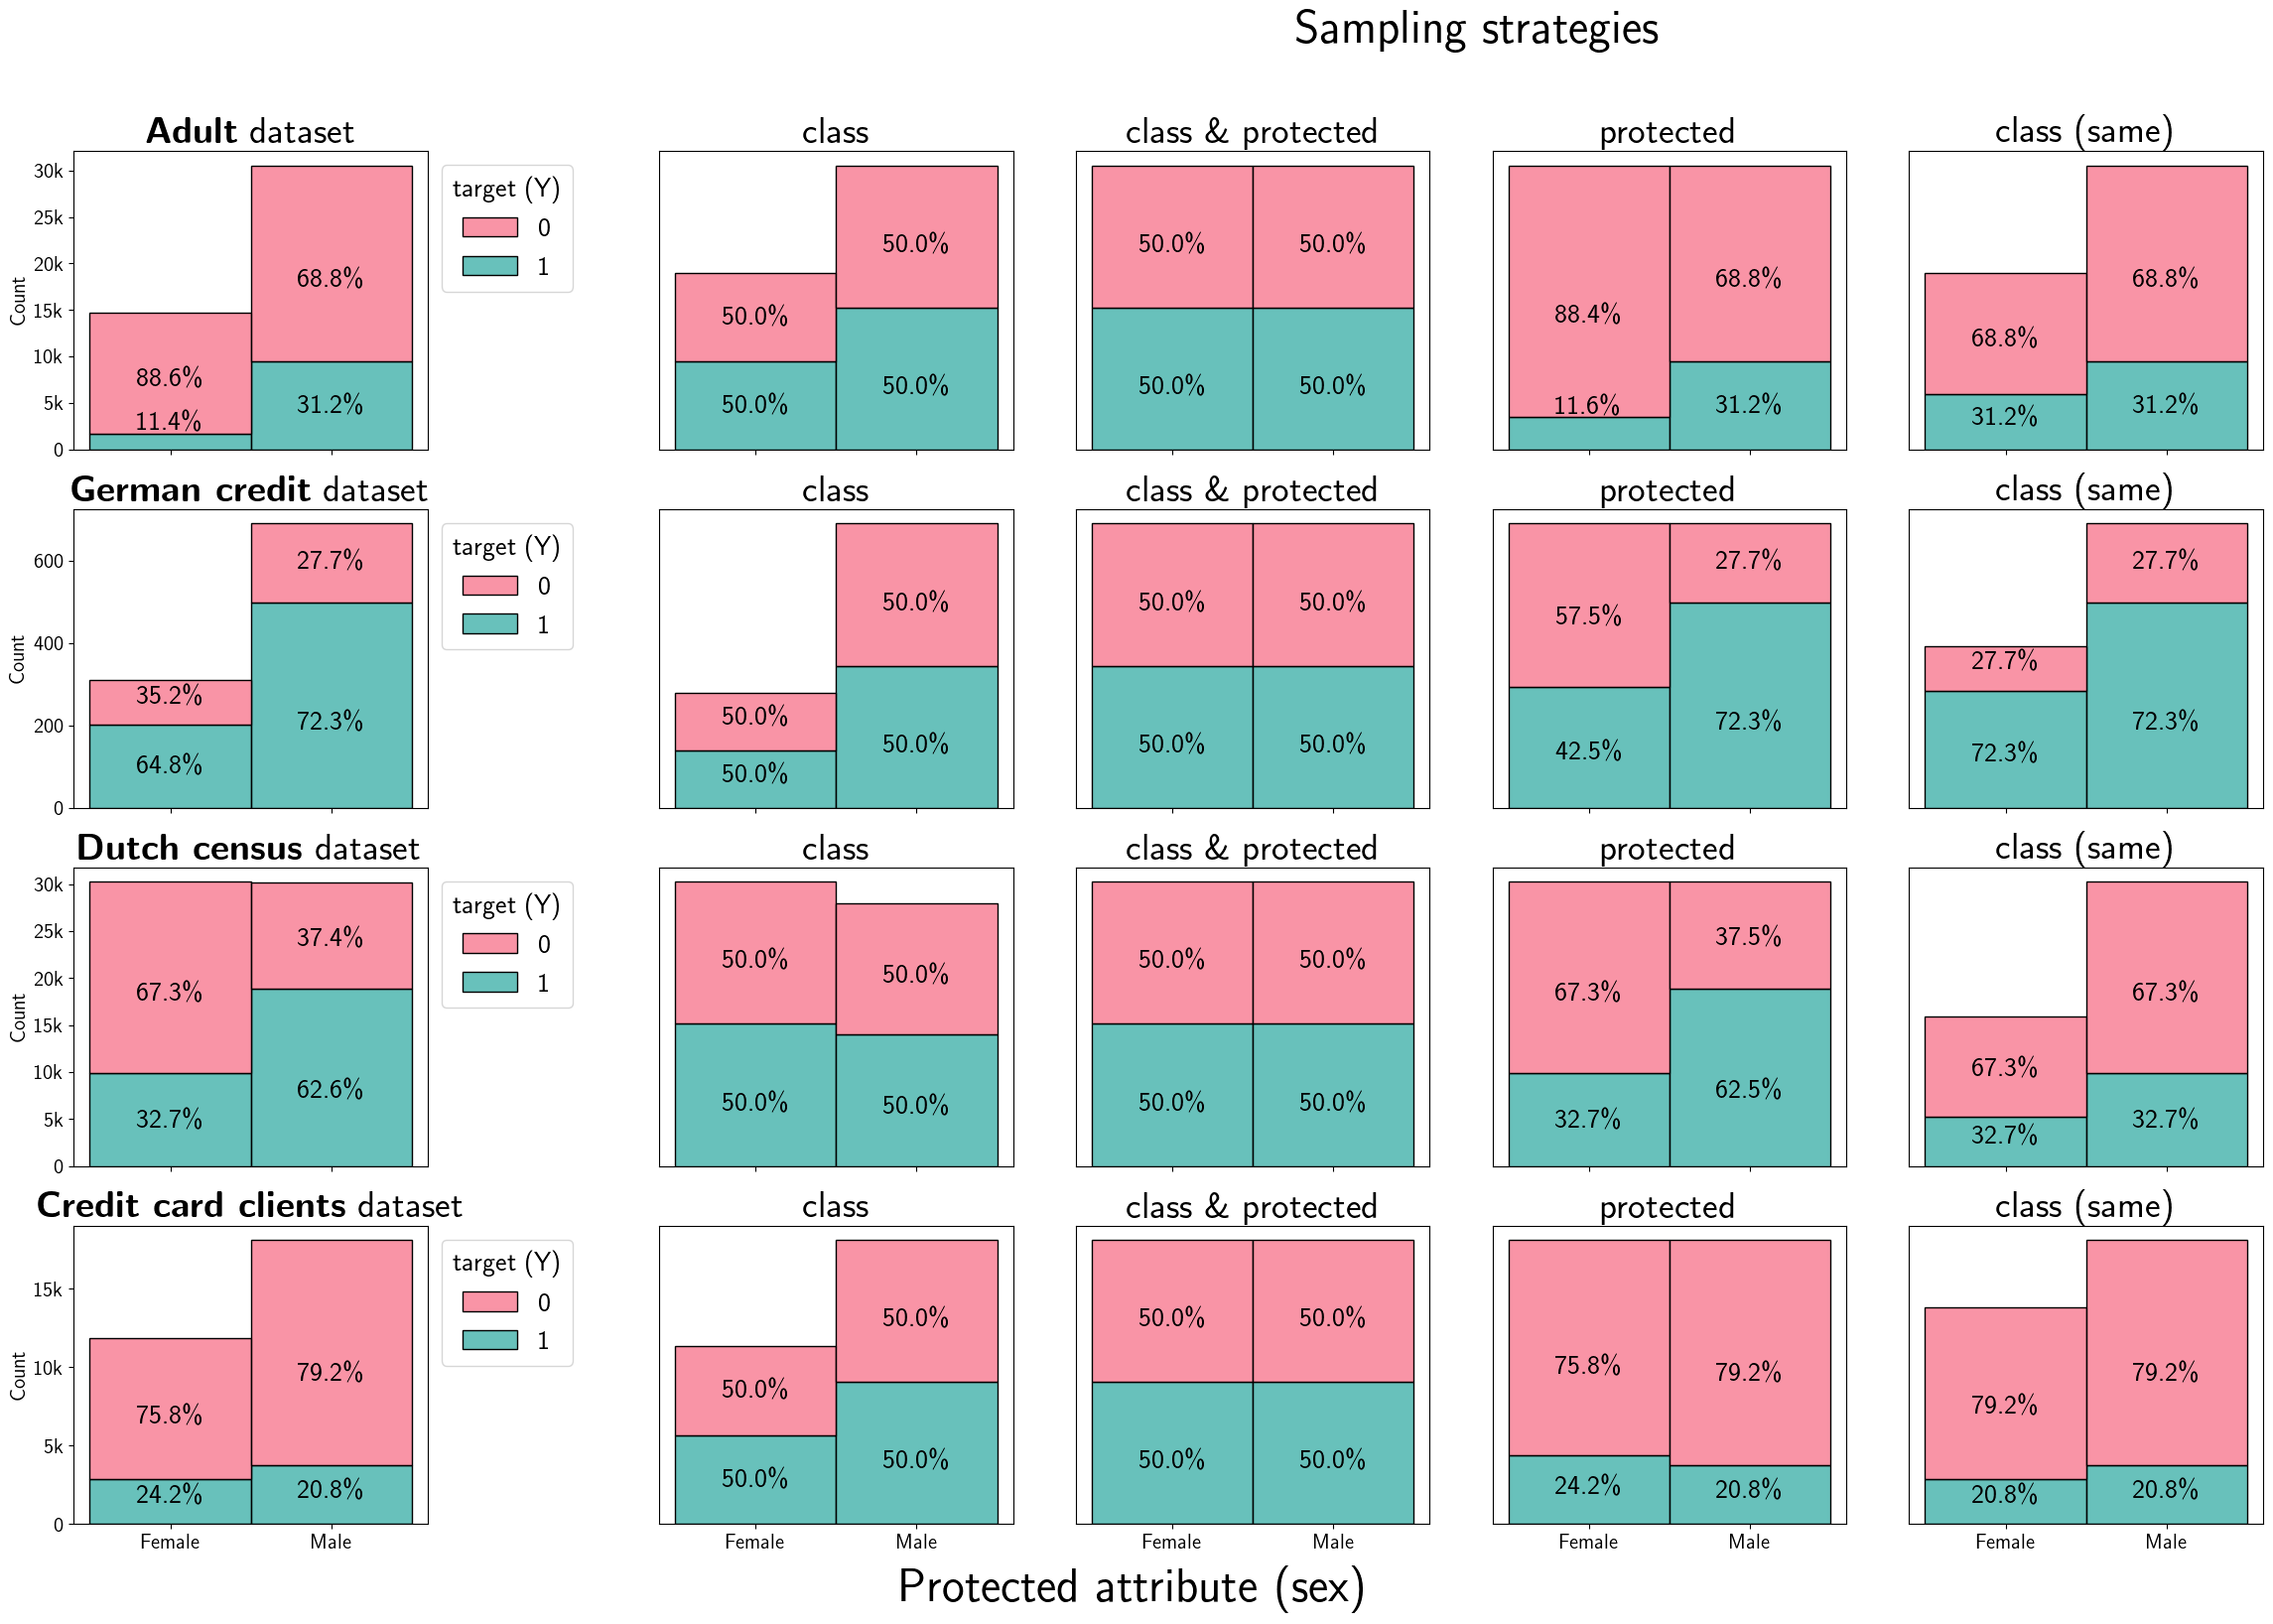

In [16]:
def create_plot(datasets, sampling_methods, final_augmented_dataset_plots_all, sampling_methods_names, min_under):
    fig, axess = plt.subplots(nrows=len(datasets), ncols=2 + len(sampling_methods), figsize=(23, 16), sharex=True, gridspec_kw={'width_ratios': [1, 0.3] + [1]*len(sampling_methods)})

    for dd, dataset in enumerate(datasets):
        
        dataset_generator = Dataset(dataset)
        target = dataset_generator.target
        axes = axess[dd, :]
        
        final_augmented_dataset_plots = final_augmented_dataset_plots_all[dd]
        # Set up the plot with two subplots in two columns

        # Define the palette using Seaborn's color palette generator
        palette = sns.color_palette("husl", 2)  # Using 'husl' palette with 2 colors

        gender_order = ['Female', 'Male']  # Adjust as per your actual category order

        dfo = dataset_generator.original_dataframe
        dfo['sex'] = dfo['sex'].replace({'female': 'Female', 'male': 'Male'})
        dfo = dfo.rename(columns={target: 'target (Y)'})

        # Plot for df1
        sns.histplot(data=dfo, x='sex', hue='target (Y)', palette=palette, multiple="stack", ax=axes[0], discrete = True)
        axes[0].set_title(nice_dataset_names[dataset], fontsize=27)
        axes[0].set_ylabel('Count', fontsize=15)

        axes[0].set_xlabel('')


        sns.move_legend(axes[0], "upper left", fontsize=20, title_fontsize=20, bbox_to_anchor=(1, 1))




        for i, final_data in enumerate(final_augmented_dataset_plots):  
            final_data['sex'] = final_data['sex'].replace({'female': 'Female', 'male': 'Male'})
            final_data = final_data.rename(columns={target: 'target (Y)'})


            sns.histplot(data=final_data, x='sex', hue='target (Y)', palette=palette, multiple="stack", ax=axes[i+2], discrete = True, legend=False)
            axes[i+2].set_title('{}'.format(sampling_methods_names[i]), fontsize=27)
            axes[i+2].set_xlabel('')

        # Adjust layout

        axes[1].axis('off') 

        for ax in axes:
            for bar in ax.patches:
                # Find the total height of bars for the current x-coordinate
                total_height = sum(p.get_height() for p in ax.patches if p.get_x() == bar.get_x())
                # Calculate the percentage
                percentage = (bar.get_height() / total_height) * 100
                # Annotate the bar with the percentage

                if bar.get_height() < min_under[dd]:
                    ax.annotate(f'{percentage:.1f}\%', 
                                xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2 + 0.4*bar.get_height()),
                                xytext=(0, 0),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom', fontsize=20)
                else:
                    ax.annotate(f'{percentage:.1f}\%', 
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2 - 0.15*bar.get_height()),
                        xytext=(0, 0),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=20)

        axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(format_ytick))

        fig.supxlabel("Protected attribute (sex)", fontsize=35)

        fig.suptitle("Sampling strategies", fontsize=35, y=1.02, x=0.65)  # Set super title


        for ii, ax in enumerate(axes):
            ax.tick_params(axis='x', labelsize=15)  # Set font size for x-axis
            ax.tick_params(axis='y', labelsize=15)  # Set font size for y-axis
            if ii>0:
                ax.yaxis.set_ticks([])
                ax.yaxis.set_ticklabels([])
                ax.set_ylabel("")

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.savefig("../results/sampling_methods_all.jpg".format(dataset), dpi=300, bbox_inches="tight", pad_inches=0)

    plt.show()
from matplotlib import rc
rc('text', usetex=True)

min_under = [5000, 0, 0, 0]
create_plot(datasets, sampling_methods, final_augmented_dataset_plots_all, sampling_methods_names, min_under)